### **Loading the YOLOv8 Model**

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**YOLOv8 Training Command**  
- **Dataset & Model:** data.yaml with yolov8n.pt  
- **Training Setup:** 100 epochs, run name = train2  
- **Hyperparameters & Augmentations:** learning rate, momentum, loss gains, and data augmentations (flip, scale, mosaic, etc.)  


In [ ]:
! yolo detect train \
  data="/content/drive/My Drive/Pkr-Currency-Notes/data.yaml" \
  model=yolov8n.pt \
  epochs=150 \
  name="train2" \
  lr0=0.01 \
  lrf=0.1 \
  momentum=0.937 \
  weight_decay=0.0005 \
  warmup_epochs=3 \
  warmup_momentum=0.8 \
  warmup_bias_lr=0.1 \
  box=7.5 \
  cls=0.5 \
  dfl=1.0 \
  hsv_h=0.015 \
  hsv_s=0.7 \
  hsv_v=0.4 \
  degrees=0.0 \
  translate=0.1 \
  scale=0.5 \
  shear=0.0 \
  perspective=0.0 \
  flipud=0.0 \
  fliplr=0.5 \
  mosaic=1.0 \
  mixup=0.2


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/Pkr-Currency-Notes/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.0, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train23, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

### **Model Validation**  


In [ ]:
model = YOLO('/content/drive/My Drive/train23/weights/best.pt')
metrics=model.val()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 284.2±92.3 MB/s, size: 894.6 KB)
val: Scanning /content/drive/My Drive/Pkr-Currency-Notes/valid/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 63/63 119.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.1it/s 3.8s
                   all         63         98      0.951      0.968      0.985      0.927
                pkr-10          3          3      0.938          1      0.995      0.995
               pkr-100         25         25          1      0.873      0.985      0.961
              pkr-1000          9          9          1      0.953      0.995       0.93
                pkr-20          2          2      0.872          1      0.995       0.92
                pkr-50      

###**mAP Evaluation**


In [ ]:
print(metrics.box.map)
print(metrics.box.map50)
print(metrics.box.map75)

0.9268223551104734
0.9847130037837754
0.9757006453013625


### **Inference Model Loading**  


In [ ]:
infr_model = YOLO("/content/runs/detect/train23/weights/best.pt")

### **Inference on Training Images**


image 1/70 /content/drive/My Drive/Pkr-Currency-Notes/train/images/IMG-20250928-WA0020_jpg.rf.96c5feec742bcf7573ffa8ddae446d6d.jpg: 640x384 1 pkr-100, 1 pkr-50, 61.1ms
image 2/70 /content/drive/My Drive/Pkr-Currency-Notes/train/images/IMG-20250928-WA0022_jpg.rf.8750c7b2218bdffdaba55caecfa2d8e7.jpg: 640x384 1 pkr-500, 8.7ms
image 3/70 /content/drive/My Drive/Pkr-Currency-Notes/train/images/IMG-20250928-WA0026_jpg.rf.27cd4ec9e0e9223e659eb76ea4a6aa1f.jpg: 640x384 1 pkr-20, 10.6ms
image 4/70 /content/drive/My Drive/Pkr-Currency-Notes/train/images/IMG-20250928-WA0028_jpg.rf.867dd9654f8684bdcd8d53c6573e5ba0.jpg: 640x384 1 pkr-1000, 9.0ms
image 5/70 /content/drive/My Drive/Pkr-Currency-Notes/train/images/IMG-20250928-WA0030_jpg.rf.26e36a3a85b0fac18fc4c1376bb6a565.jpg: 384x640 1 pkr-100, 1 pkr-5000, 60.6ms
image 6/70 /content/drive/My Drive/Pkr-Currency-Notes/train/images/IMG-20250928-WA0032_jpg.rf.a31c38f91a75537e413cd3310602ae0d.jpg: 640x384 1 pkr-100, 12.8ms
image 7/70 /content/drive/My Dr

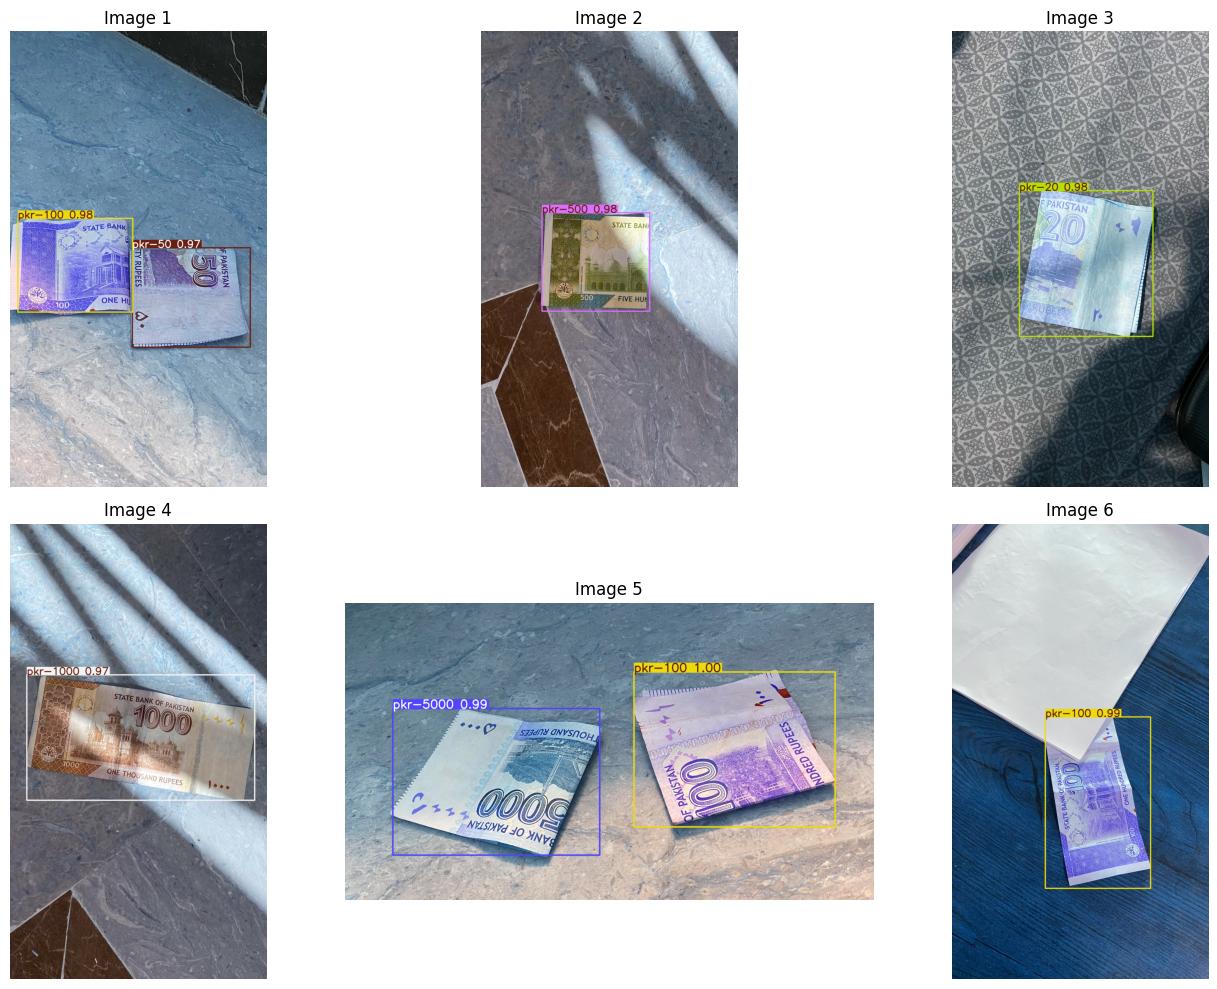

In [ ]:
import matplotlib.pyplot as plt

results = infr_model("/content/drive/My Drive/Pkr-Currency-Notes/train/images")
n = 6

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes[:n]):
    res = results[i]
    im = res.plot()
    ax.imshow(im)
    ax.axis("off")
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()


### **Inference on validation Images**


image 1/63 /content/drive/My Drive/Pkr-Currency-Notes/valid/images/IMG-20250928-WA0024_jpg.rf.56618835aadc9ce4dbf66b81196adb71.jpg: 640x384 1 pkr-100, 6.4ms
image 2/63 /content/drive/My Drive/Pkr-Currency-Notes/valid/images/IMG-20250928-WA0052_jpg.rf.dc590dab0e111e30019fdac04698c9c4.jpg: 640x384 1 pkr-500, 6.0ms
image 3/63 /content/drive/My Drive/Pkr-Currency-Notes/valid/images/IMG-20250928-WA0058_jpg.rf.47f543d043b88ae51ccf58f4acb340cc.jpg: 640x384 1 pkr-500, 5.8ms
image 4/63 /content/drive/My Drive/Pkr-Currency-Notes/valid/images/IMG-20250928-WA0060_jpg.rf.154bc0ee1d02b337d3739cd7d7d2b1b9.jpg: 640x384 1 pkr-100, 1 pkr-50, 2 pkr-5000s, 5.9ms
image 5/63 /content/drive/My Drive/Pkr-Currency-Notes/valid/images/IMG-20250928-WA0062_jpg.rf.b9b2e1c77e9e7307ad23d663379608bb.jpg: 640x384 1 pkr-50, 5.9ms
image 6/63 /content/drive/My Drive/Pkr-Currency-Notes/valid/images/IMG-20250928-WA0066_jpg.rf.b0f5c680dea1d2e35ad292915cf90038.jpg: 640x384 1 pkr-100, 1 pkr-50, 6.0ms
image 7/63 /content/drive

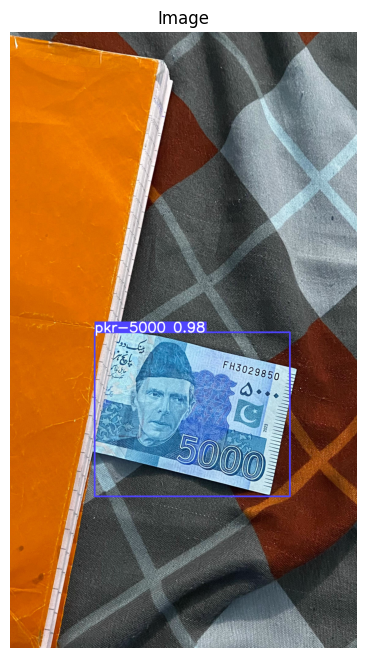

In [ ]:
import matplotlib.pyplot as plt

results = infr_model("/content/drive/My Drive/Pkr-Currency-Notes/valid/images")
res = results[34]
im = res.plot()
plt.figure(figsize=(8, 8))
plt.imshow(im)
plt.axis("off")
plt.title("Image")
plt.show()




### **Inference on Uploaded Images**

Saving IMG_2627.jpeg to IMG_2627.jpeg

0: 640x384 1 pkr-10, 10.2ms
Speed: 2.8ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


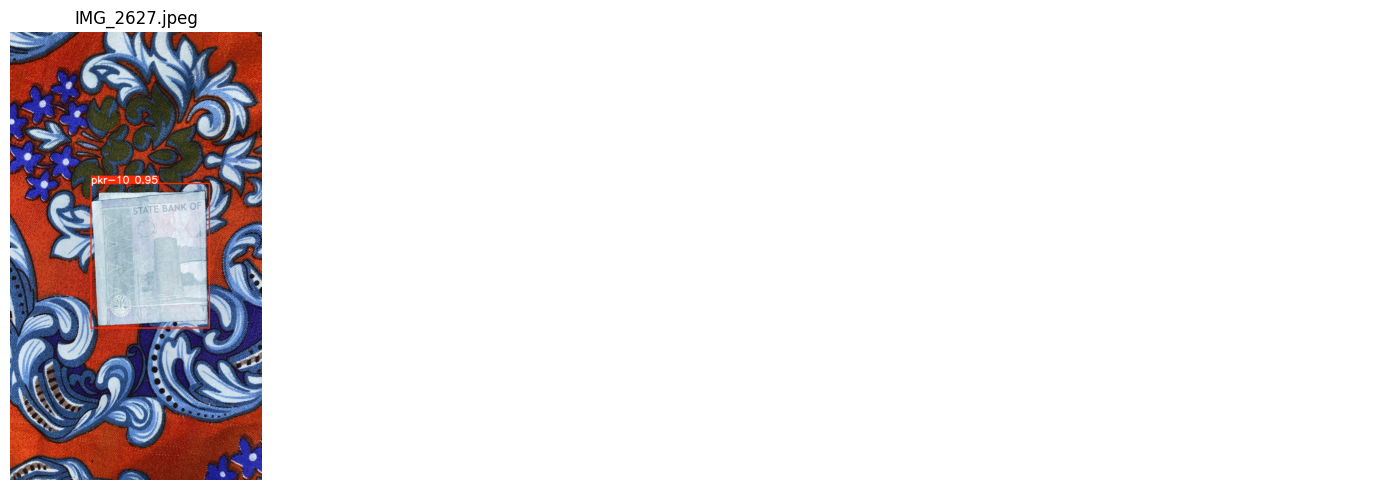

In [ ]:
from google.colab import files
from PIL import Image
import os
import matplotlib.pyplot as plt

uploaded = files.upload()
converted_files = []

for filename in uploaded.keys():
    if filename.endswith('.jfif'):
        image = Image.open(filename)
        new_filename = filename.replace('.jfif', '.jpg')
        image.save(new_filename, 'JPEG')
        filename = new_filename
    converted_files.append(filename)

results = infr_model(converted_files, conf=0.25)

n = len(results)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()

for i, r in enumerate(results):
    im_array = r.plot()
    axes[i].imshow(im_array)
    axes[i].set_title(os.path.basename(converted_files[i]))
    axes[i].axis("off")

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
